In [49]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [50]:
data_df = pd.read_csv('./source/Dataset/cardio_data.csv')

In [51]:
len(data_df)

70000

In [52]:
data_df['ap_hi'].unique()

array([  110,   140,   130,   150,   100,   120,   145,   170,   135,
         125,    90,   180,   160,   133,   190,    80,   122,   169,
         126,   158,   200,    14,   123,    70,   161,   147,   115,
         137,   153,    11,   148,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   906,   117,   134,
         166,   210,   176,   116,    10,   121,    16,   112,   159,
         113,   118,   155,   142,   131,   157,   136,   146,   138,
        -100,   909,   109,    85,   106,   129,    93,     7,    95,
         179,   156,   168,   132,   104,   103,   178,   175,   128,
         151,    15,   139, 11500,   127,    17,   108,   144,   102,
           1,  1420,    13,   143,   701,   107,   184,   149,   167,
         114,   101,    60,  1500,   181,   171,   202,  -115,   111,
         907,    20,   188,   185,   163,   173,   154,   177,  -140,
         174,  -120, 14020,  1400,   240,   191,   197,  1620,   152,
          96,   199,

In [53]:
#Given that the highest reading 220 and low reading is below 100, we are seeing some abnormal numbers.
data_df_reduced = data_df[(data_df['ap_hi'] <= 220) & (data_df['ap_lo'] <=100 )]
len(data_df_reduced)

68220

In [54]:
data_df = data_df_reduced

In [55]:
data_df['ap_lo'].unique()

array([ 80,  90,  70, 100,  60,  85,  89,  65,  63,  79,  50,  30,  84,
        91,  40,  73,  78,  75,  86,  87,  82,  95,  69,  74,  97,  81,
        83,  93,  99,  77,  59,  92,  68,  61,  94,  66,  52,  76,  62,
        96,  67,  10,  88,   8,  71,  72,  98,  20,  57,  64,   0,  45,
        58,   7,   6,  53,   1,  56,   9,  55,  15, -70,  54,  49])

In [56]:
#data_df.age_years.unique()

Correcting the data type

In [57]:
data_df['date'] = pd.to_datetime(data_df['date'], format="%d-%m-%Y")
#data_df.dtypes

In [58]:
def show_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values for column '{column}': {unique_values}")

In [59]:
data_df['age_years'] = data_df['age'] / 365
data_df['age_years'] = data_df['age_years'].astype(int)
data_df.drop(columns=['age'], inplace=True)


data_df['bmi'] = data_df['weight'] / ((data_df['height'] / 100) **2)

In [60]:
#TO CHECK age_years for <20 and >60
data_df['age_years'].describe()


count    68220.000000
mean        52.818514
std          6.775068
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: age_years, dtype: float64

In [61]:
data_df

,date,country,id,active,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease,age_years,bmi
0,2021-05-03,Indonesia,0,1,0,110,80,1,2,1,168,Architect,0,62.0,0,50,21.967120
1,2021-08-05,Malaysia,1,1,0,140,90,3,1,1,156,Accountant,0,85.0,1,55,34.927679
2,2022-11-13,Indonesia,2,0,0,130,70,3,1,1,165,Chef,0,64.0,1,51,23.507805
3,2018-10-31,Singapore,3,1,0,150,100,1,2,1,169,Lawyer,0,82.0,1,48,28.710479
4,2020-09-25,Singapore,4,0,0,100,60,1,1,1,156,Architect,0,56.0,0,47,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2018-04-03,Singapore,99993,1,0,120,80,1,2,1,168,Doctor,1,76.0,0,52,26.927438
69996,2022-01-12,Malaysia,99995,1,0,140,90,2,1,2,158,Accountant,0,126.0,1,61,50.472681
69997,2022-08-25,Malaysia,99996,0,1,180,90,3,2,1,183,Accountant,0,105.0,1,52,31.353579
69998,2020-07-13,Singapore,99998,0,0,135,80,1,1,2,163,Accountant,0,72.0,1,61,27.099251


In [62]:
def populate_bplevels_columns(df):

    #x = 0
    for x in range(len(df)):
        #print(df.ap_hi[x])
        try:
            if df.ap_hi[x] < 120 and df.ap_lo[x] < 80:
                df.loc[x, 'bp_normal'] = 1
            elif df.ap_hi[x] < 129 and df.ap_lo[x] < 80:
                df.loc[x, 'bp_elevated'] = 1
            elif df.ap_hi[x] < 139 or df.ap_lo[x] < 89:
                df.loc[x, 'bp_hypertension1'] = 1
            else:
                df.loc[x, 'bp_hypertension2'] = 1
        except:
            pass
    
    return df

    #print(df.ap_hi[1])


#data_df.drop(columns=['bp_normal','bp_elevated','bp_hypertension1','bp_hypertension2'])        

data_df['bp_normal'] = 0
data_df['bp_elevated'] = 0
data_df['bp_hypertension1'] = 0
data_df['bp_hypertension2'] = 0


data_df = populate_bplevels_columns(data_df)




In [63]:
#Save copy for analysis
data_df.to_csv('./source/Dataset/analysis_copy.csv', index=False)

In [64]:
bp_df = data_df[['bp_normal', 'bp_elevated', 'bp_hypertension1', 'bp_hypertension2']]

show_unique_values(bp_df)

Unique values for column 'bp_normal': [0 1]
Unique values for column 'bp_elevated': [0 1]
Unique values for column 'bp_hypertension1': [1 0]
Unique values for column 'bp_hypertension2': [0 1]


In [65]:

data_df.drop(columns=['ap_hi', 'ap_lo'], inplace=True)

In [66]:
def populates_agebinned_columns(category_age, df):
    for cat in category_age:
        df[f'age_binned_{cat}'] = 0
        df.loc[df['age_binned'] == cat, f'age_binned_{cat}'] = 1

    return df
  

#further categoried the age group
bin_age = [19, 29, 39, 49, 59, 69]
category_age = ['20s', '30s', '40s', '50s', '60s']
data_df['age_binned'] = pd.cut(data_df['age_years'], bins=bin_age, labels=category_age)
#df_drug = df_drug.drop(['Age'], axis = 1)

data_df = populates_agebinned_columns(category_age, data_df)
data_df.drop(columns=['age_years','age_binned'], axis=1, inplace=True)


In [67]:
#Drop it first, to change the top codes!!!
data_df.columns
#data_df.drop(columns=['age_binned_<20s','age_binned_>60s'], inplace=True)


Index(['date', 'country', 'id', 'active', 'alco', 'cholesterol', 'gender',
       'gluc', 'height', 'occupation', 'smoke', 'weight', 'disease', 'bmi',
       'bp_normal', 'bp_elevated', 'bp_hypertension1', 'bp_hypertension2',
       'age_binned_20s', 'age_binned_30s', 'age_binned_40s', 'age_binned_50s',
       'age_binned_60s'],
      dtype='object')

In [68]:
#Further binning Blood Pressure
#data_df.ap_hi.describe()

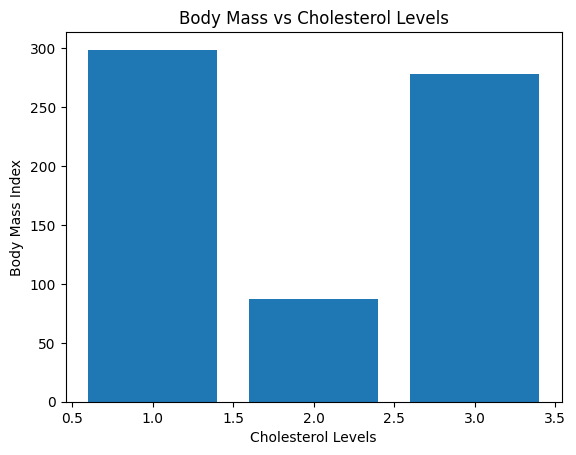

In [69]:
cholesterol_levels = data_df['cholesterol']
bmi_values = data_df['bmi']

bars = plt.bar(cholesterol_levels, bmi_values, label="bmi")
plt.xlabel('Cholesterol Levels')
plt.ylabel('Body Mass Index')
plt.title("Body Mass vs Cholesterol Levels")

plt.show()

Hypothesis for gender: Male usually are taller and weights  more than Female. Thus, assumption is that Gender(1=F, 0=M)
Cholestrol level: 1=LOW, 2=MEDIUM, 3=HIGH

FINDINGS
The relationship between BMI (Body Mass Index) and cholesterol levels can vary based on various factors including genetics, diet, lifestyle, and overall health. While there's no direct correlation between BMI and cholesterol levels, it's possible for someone to have a high BMI but low cholesterol and vice versa.

In [70]:
# Create bar chart
#plt.bar(data_df.country, data_df.disease)

# Group by Country and sum occurrences of disease value 1
counts = data_df[data_df['disease'] == 1].groupby('occupation').size()
counts.sort_values(ascending=False)
# Plotting the bar chart
#counts.plot(kind='bar')

# Add labels and title
#plt.xlabel('Occupation')
#plt.ylabel('Disease Count')
#plt.title('Bar Chart Example')

# Adding country names as legends
#plt.legend(labels=counts.index, title='Occupation')

# Show the plot
#plt.show()

occupation
Accountant    3824
Nurse         3790
Architect     3765
Others        3764
Lawyer        3712
Teacher       3703
Doctor        3673
Chef          3654
Engineer      3624
dtype: int64

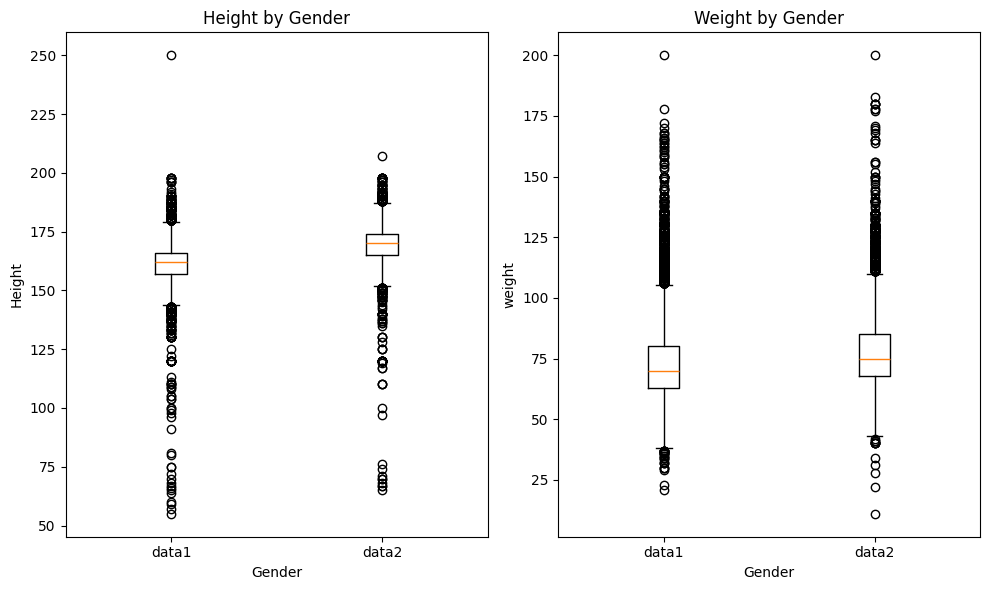

In [71]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.boxplot([data_df[data_df['gender'] == 1]['height'], data_df[data_df['gender'] == 2]['height']], labels=['data1','data2'])
plt.xlabel('Gender')
plt.ylabel('Height')
plt.title("Height by Gender")

plt.subplot(1, 2, 2)
plt.boxplot([data_df[data_df['gender'] == 1]['weight'], data_df[data_df['gender'] == 2]['weight']], labels=['data1','data2'])
plt.xlabel('Gender')
plt.ylabel('weight')
plt.title("Weight by Gender")

plt.tight_layout()
plt.show()

To the fact that typically Males are heavier and taller than Females.Thus 'data1' is deemed to be females and 'data2' is males.

Another point is, there are many outliers shown above. That may result positive or negative impact to the ML model which shall be addressed later.

In [72]:
#define the gender
data_df['gender_male'] = 0
data_df['gender_female'] = 0

data_df.loc[data_df['gender'] == 1, 'gender_female'] = 1
data_df.loc[data_df['gender'] == 2, 'gender_male'] = 1

data_df.drop('gender', axis=1, inplace=True)


In [73]:

def doExcludeOutliers(column_name):

    #Try to workout with the outliers
    q1 = data_df[column_name].quantile(0.25)
    q3 = data_df[column_name].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for acceptable values
    threshold_lower = q1 - 1.5 * iqr
    threshold_upper = q3 + 1.5 * iqr

    # Identify outliers in the 'height' column
    outliers = data_df[(data_df[column_name] < threshold_lower) | (data_df[column_name] > threshold_upper)]

    # Exclude outliers from the dataset, but keep those within the threshold range
    filtered_data1 = data_df[(data_df[column_name] >= threshold_lower) & (data_df[column_name] <= threshold_upper)]

    plt.boxplot(filtered_data1[column_name], labels=[f'{column_name}_test'])
    plt.show()

    data_df = filtered_data1


In [74]:
#doExcludeOutliers('weight')
#doExcludeOutliers('height')

In [75]:
#define the cholesterol leves
data_df['cholesterol_high'] = 0
data_df['cholesterol_medium'] = 0
data_df['cholesterol_low'] = 0

data_df.loc[data_df['cholesterol'] == 1, 'cholesterol_low'] = 1
data_df.loc[data_df['cholesterol'] == 2, 'cholesterol_medium'] = 1
data_df.loc[data_df['cholesterol'] == 3, 'cholesterol_high'] = 1

data_df.drop('cholesterol', axis=1, inplace=True)



In [76]:
#define the gluc leves
data_df['gluc_high'] = 0
data_df['gluc_medium'] = 0
data_df['gluc_low'] = 0

data_df.loc[data_df['gluc'] == 1, 'gluc_low'] = 1
data_df.loc[data_df['gluc'] == 2, 'gluc_medium'] = 1
data_df.loc[data_df['gluc'] == 3, 'gluc_high'] = 1

data_df.drop('gluc', axis=1, inplace=True)


In [77]:
country_mapping_dict = {'Indonesia': 0, 
                        'Malaysia': 1,
                        'Singapore' : 2,
                        'India' : 3}

# Map values in columnA using the mapping dictionary
data_df['country_num'] = data_df['country'].map(country_mapping_dict)

#data_df[['country', 'country_num']].drop_duplicates()
data_df.drop('country', axis=1, inplace=True)

In [78]:
#data_df.max()

In [79]:
data_df.occupation.unique()

occupation_mapping_dict = {'Architect' : 0, 
                           'Accountant' : 1,
                           'Chef' : 2, 
                           'Lawyer' : 3, 
                           'Teacher' : 4, 
                           'Nurse' : 5,
                           'Engineer' : 6, 
                           'Doctor' : 7, 
                           'Others' : 8}

# Map values in columnA using the mapping dictionary
data_df['occupation_num'] = data_df['occupation'].map(occupation_mapping_dict)

#data_df[['occupation', 'occupation_num']].drop_duplicates()
data_df.drop(columns=['occupation'], inplace=True)


In [80]:
#data_df['gluc'].unique()

data_df.corr()

#data_df['age_binned_>60s'].unique()

,date,id,active,alco,height,smoke,weight,disease,bmi,bp_normal,...,gender_male,gender_female,cholesterol_high,cholesterol_medium,cholesterol_low,gluc_high,gluc_medium,gluc_low,country_num,occupation_num
date,1.000000,-0.000978,0.000517,0.010025,0.000963,0.004185,-0.001461,-0.002546,-0.002720,0.006674,...,0.002308,-0.002308,-0.002965,0.004306,-0.001226,-0.008005,0.002262,0.004301,-0.003590,0.005661
id,-0.000978,1.000000,0.003834,0.001078,-0.002632,-0.003958,-0.001477,0.003852,-0.001108,-0.017871,...,0.003240,-0.003240,0.005386,0.000562,-0.004398,0.001677,0.000629,-0.001707,0.002485,0.002139
active,0.000517,0.003834,1.000000,0.024924,-0.007748,0.025063,-0.017754,-0.037964,-0.014436,0.011777,...,0.004562,-0.004562,0.012632,-0.005920,-0.004595,-0.002401,-0.012060,0.010598,-0.001027,-0.001164
alco,0.010025,0.001078,0.024924,1.000000,0.094769,0.341821,0.066253,-0.010179,0.012615,-0.014113,...,0.170744,-0.170744,0.015083,0.038484,-0.041487,-0.004281,0.029516,-0.018382,0.000975,-0.000190
height,0.000963,-0.002632,-0.007748,0.094769,1.000000,0.187266,0.292527,-0.010989,-0.293406,-0.078728,...,0.495909,-0.495909,-0.040954,-0.024958,0.049791,-0.014203,-0.012447,0.019660,-0.001018,0.002338
smoke,0.004185,-0.003958,0.025063,0.341821,0.187266,1.000000,0.066533,-0.017953,-0.028131,-0.012031,...,0.338567,-0.338567,-0.003926,0.023814,-0.015937,-0.014261,0.015281,-0.000557,0.003191,-0.000298
weight,-0.001461,-0.001477,-0.017754,0.066253,0.292527,0.066533,1.000000,0.177993,0.757359,-0.176564,...,0.156054,-0.156054,0.111983,0.065790,-0.134207,0.068143,0.092863,-0.118541,0.000009,-0.002390
disease,-0.002546,0.003852,-0.037964,-0.010179,-0.010989,-0.017953,0.177993,1.000000,0.162090,-0.215155,...,0.005696,-0.005696,0.192734,0.079518,-0.204342,0.070546,0.050805,-0.089598,-0.001248,-0.002610
bmi,-0.002720,-0.001108,-0.014436,0.012615,-0.293406,-0.028131,0.757359,0.162090,1.000000,-0.123015,...,-0.095351,0.095351,0.117434,0.065330,-0.137846,0.066105,0.084820,-0.111149,0.002054,-0.002607
bp_normal,0.006674,-0.017871,0.011777,-0.014113,-0.078728,-0.012031,-0.176564,-0.215155,-0.123015,1.000000,...,-0.079054,0.079054,-0.084958,-0.000311,0.062620,-0.046749,-0.010257,0.042269,0.000272,-0.000204


Text(0.5, 1.0, 'Correlation Heatmap')

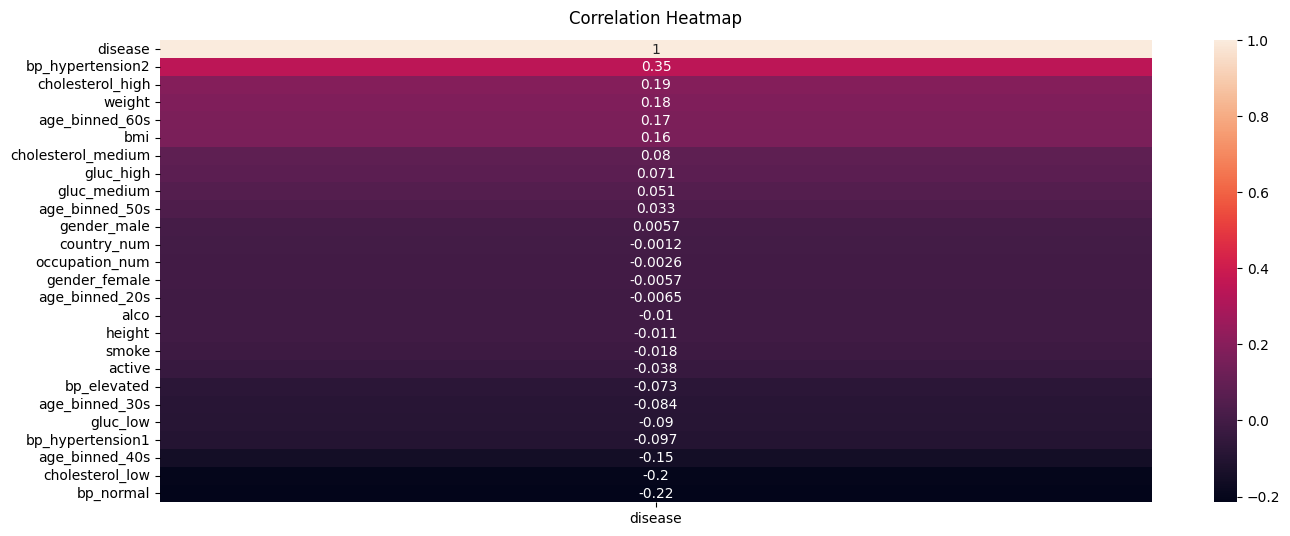

In [81]:
import seaborn as sns

iddate_removed_df = data_df.drop(columns=['id','date'])

plt.figure(figsize=(16, 6))

#heatmap = sns.heatmap(data_df.corr()[['gluc_low', 'gluc_medium', 'gluc_high']],
heatmap = sns.heatmap(iddate_removed_df.corr()[['disease']].sort_values(by=['disease'],ascending=False),
                      annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


In [82]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [83]:
def doLogisticRegression(df, age_group_param):
    
    X = df.drop(columns=['disease'], axis = 1)
    y = df['disease']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

    lr = LogisticRegression(C=0.5, fit_intercept=True, solver='liblinear', max_iter=50000)

    lr.fit(X_train, y_train)

    pred = lr.predict(X_test)

    print(f"Training Score for {age_group_param}: ", lr.score(X_train, y_train))
    print(f"Test Score for {age_group_param}: ", lr.score(X_test, y_test))


    report_dict = classification_report(y_test, pred, output_dict=True)
    report_df = pd.DataFrame.from_dict(report_dict)
    report_df = report_df.transpose()
    report_df['age_group'] = age_group_param

    return report_df

    #accuracy = metrics.accuracy_score(pred, y_test)

    #print("The Accuracy of the logistic regression model is: ", accuracy*100, "%")

In [84]:
def doKNNClassifier(df, age_group_param):
    
    X = df.drop(columns=['disease'], axis = 1)
    y = df['disease']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

    knn = KNeighborsClassifier(n_neighbors = 3)

    knn.fit(X_train, y_train)

    pred = knn.predict(X_test)
    print(f"Training Score for {age_group_param}: ", knn.score(X_train, y_train))
    print(f"Test Score for {age_group_param}: ", knn.score(X_test, y_test))

    #acc = metrics.accuracy_score(pred, y_test)

    #print("The accuracy of the KNN model is: ", acc*100, "%")

    report_dict = classification_report(y_test, pred, output_dict=True)
    report_df = pd.DataFrame.from_dict(report_dict)
    report_df['age_group'] = age_group_param
    report_df = report_df.transpose()

    return report_df 

In [85]:
# Feature Selection
selected_df = iddate_removed_df
#selected_30_df = iddate_removed_df[iddate_removed_df['age_binned_30s'] == 1]

selected_columns = selected_df.filter(regex=r'^age_')
selected_columns.drop('age_binned_20s', axis=True, inplace=True)

merge_df = pd.DataFrame()

for col in selected_columns.columns:
    #print(col)
    df = selected_df[iddate_removed_df[col] == 1]
    #selected_df = iddate_removed_df.loc[(iddate_removed_df['age_binned_30s']==1) & (iddate_removed_df['disease'] == 1)]

    age_group = col[-3:]
    #result_df = doLogisticRegression(df, age_group)
    #print(result_df)
    merge_df = pd.concat([merge_df, doLogisticRegression(df, age_group)], axis=0)

#result_df
merge_df

/var/folders/9z/mnm4320d2xs_dyw14xf405340000gn/T/ipykernel_1950/2235158544.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns.drop('age_binned_20s', axis=True, inplace=True)


Training Score for 30s:  0.8390522875816994
Test Score for 30s:  0.8304761904761905
Training Score for 40s:  0.7554101286532312
Test Score for 40s:  0.7560721721027065
Training Score for 50s:  0.6762566137566137
Test Score for 50s:  0.6696884945510657
Training Score for 60s:  0.6802070439968493
Test Score for 60s:  0.6920451562089788


,precision,recall,f1-score,support,age_group
0,0.838362,0.965261,0.897347,403.000000,30s
1,0.770492,0.385246,0.513661,122.000000,30s
accuracy,0.830476,0.830476,0.830476,0.830476,30s
macro avg,0.804427,0.675253,0.705504,525.000000,30s
weighted avg,0.822590,0.830476,0.808186,525.000000,30s
0,0.745146,0.930816,0.827696,3628.000000,40s
1,0.796266,0.459270,0.582542,2136.000000,40s
accuracy,0.756072,0.756072,0.756072,0.756072,40s
macro avg,0.770706,0.695043,0.705119,5764.000000,40s
weighted avg,0.764090,0.756072,0.736848,5764.000000,40s


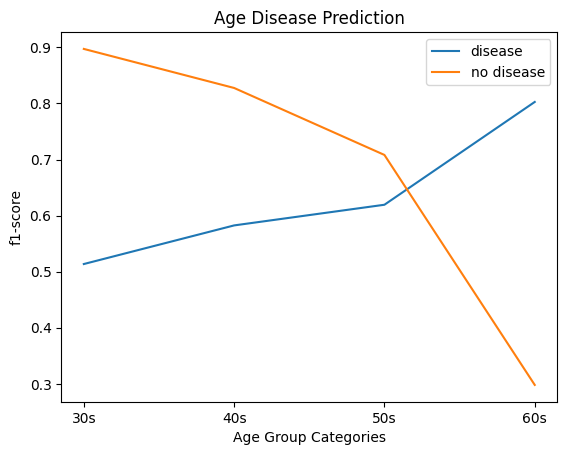

In [86]:
x_axis = merge_df['age_group'].drop_duplicates().values

markers_nodisease = merge_df['f1-score']['0']
markers_withdisease = merge_df['f1-score']['1']

plt.plot(x_axis, markers_withdisease, label='disease')
plt.plot(x_axis, markers_nodisease, label='no disease')

plt.xlabel("Age Group Categories")
plt.ylabel("f1-score")
plt.legend()
plt.title('Age Disease Prediction')
plt.show()


